Demo presenting how to use class `FilesystemImageSource`. It assumes that `phantom_2_7_2017` directory from s3 storage is downloaded to data directory before starting.

Downloading them is as simple as:
```
s3cmd get --recursive s3://alpenglowoptics/phantom_2_7_2017/
```

Note that in this example order of images in odd strips is reversed. This can be fixed with command:
```
 for x in `seq 1 900`; do a=000001_$(printf %05d $x).tif; b=000001_$(printf %05d $((1801 - x))).tif; echo "swap $a $b"; mv $a tmp; mv $b $a; mv tmp $b; done
```


In [ ]:
import configparser
import os.path
from alpenglow.image_sources.filesystem import FilesystemImageSource

path_format = '../data/{stripe_id:06d}/{stripe_id:06d}_{version_id:05d}.tif'
stripe_ids = [0, 1, 2]
version_ids = [1, 256, 512, 768, 1024, 1280, 1536, 1800]

image_source = FilesystemImageSource(path_format, stripe_ids, version_ids)

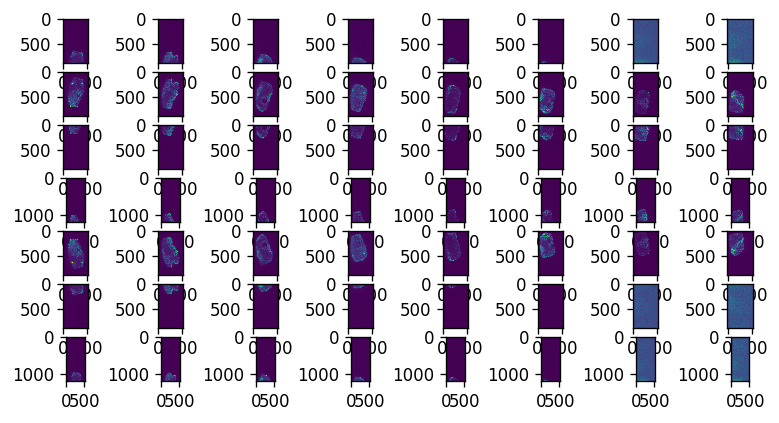

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4), dpi=120)

version_count = image_source.version_count()
stripe_count = image_source.stripe_count() * 2 + 1
for version_id in range(version_count):
    for stripe_id in range(stripe_count):
        ax = fig.add_subplot(stripe_count, version_count, 1 + version_id + version_count * stripe_id)
        ax.imshow(image_source.get_image(stripe_id, version_id))
plt.show()